In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import utils

data_dir = "D:/DATA/ClockV2/final_dense"

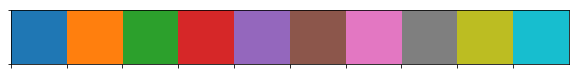

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 20

cp = sns.color_palette()
sns.palplot(cp)
plt.show()

C:\Users\Stavros\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


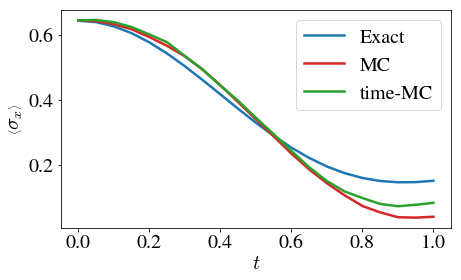

In [9]:
n_sites = 6
time_steps = 20
h_init = 1.0
h_ev = 0.5
t = np.linspace(0.0, 1.0, time_steps + 1)


fstate_sampling = np.load("{}/sampling20000_mpsD3_N{}M{}.npy".format(data_dir, n_sites, time_steps))
fstate_spacesampling = np.load("{}/spacesampling1000_mpsD3_N{}M{}.npy".format(data_dir, n_sites, time_steps))
exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev, dtype=fstate_sampling.dtype)

pauli = utils.Pauli(dtype=exact_state.dtype)
sampling_X = utils.ev_local(fstate_sampling, pauli.X)
spacesampling_X = utils.ev_local(fstate_spacesampling, pauli.X)

plt.figure(figsize=(7, 4))
plt.plot(t, exact_obs["X"], color=cp[0], linewidth=2.5, label="Exact")
plt.plot(t, spacesampling_X, color=cp[3], linewidth=2.5, label="MC")
plt.plot(t, sampling_X, color=cp[2], linewidth=2.5, label="time-MC")
plt.xlabel("$t$")
plt.ylabel(r"$\left \langle \sigma _x\right \rangle$")
plt.legend()
plt.show()

In [10]:
(np.abs(fstate_spacesampling)**2).sum(axis=1)

array([0.9948508 , 0.99464631, 0.99635023, 0.99825109, 0.99997836,
       1.00831236, 1.01962532, 1.02971714, 1.03853818, 1.04756969,
       1.05806336, 1.06694294, 1.0700804 , 1.08124349, 1.09228686,
       1.10206627, 1.08949511, 1.09894165, 1.10704337, 1.11553997,
       1.11652196])

Normalize states before calculating observables

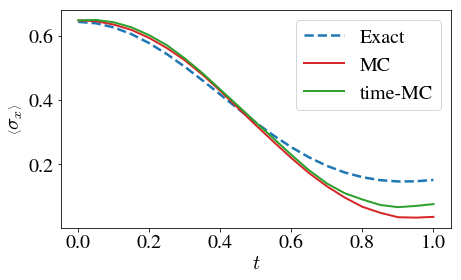

In [13]:
fstate_sampling *= 1.0 / np.sqrt((np.abs(fstate_sampling)**2).sum(axis=1))[:, np.newaxis]
fstate_spacesampling *= 1.0 / np.sqrt((np.abs(fstate_spacesampling)**2).sum(axis=1))[:, np.newaxis]

sampling_X = utils.ev_local(fstate_sampling, pauli.X)
spacesampling_X = utils.ev_local(fstate_spacesampling, pauli.X)

plt.figure(figsize=(7, 4))
plt.plot(t, exact_obs["X"], "--", color=cp[0], linewidth=2.5, label="Exact")
plt.plot(t, spacesampling_X, color=cp[3], linewidth=2.0, label="MC")
plt.plot(t, sampling_X, color=cp[2], linewidth=2.0, label="time-MC")
plt.xlabel("$t$")
plt.ylabel(r"$\left \langle \sigma _x\right \rangle$")
plt.legend()
plt.show()

In [12]:
(np.abs(fstate_spacesampling)**2).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])